<a href="https://colab.research.google.com/github/subham129/Deep-learning/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import PIL
import os
import cv2

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 11s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

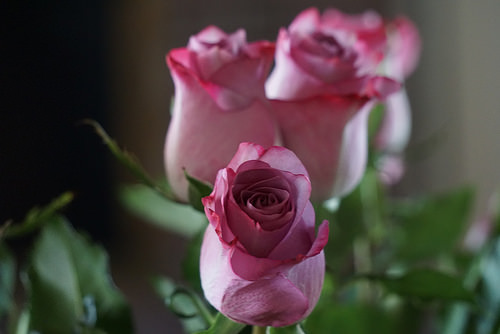

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))


In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(334, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y = [],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
92/92 [==============================] - 99s 1s/step - loss: 1.3677 - accuracy: 0.4121
Epoch 2/10
92/92 [==============================] - 91s 989ms/step - loss: 0.9968 - accuracy: 0.6029
Epoch 3/10
92/92 [==============================] - 94s 1s/step - loss: 0.8203 - accuracy: 0.6853
Epoch 4/10
92/92 [==============================] - 93s 1s/step - loss: 0.6151 - accuracy: 0.7783
Epoch 5/10
92/92 [==============================] - 94s 1s/step - loss: 0.4073 - accuracy: 0.8535
Epoch 6/10
92/92 [==============================] - 92s 1s/step - loss: 0.2184 - accuracy: 0.9312
Epoch 7/10
92/92 [==============================] - 96s 1s/step - loss: 0.1579 - accuracy: 0.9547
Epoch 8/10
92/92 [==============================] - 92s 1s/step - loss: 0.0675 - accuracy: 0.9837
Epoch 9/10
92/92 [==============================] - 93s 1s/step - loss: 0.0499 - accuracy: 0.9888
Epoch 10/10
92/92 [==============================] - 94s 1s/step - loss: 0.0139 - accuracy: 0.9983


In [ ]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 1s 34ms/step - loss: 1.6634 - accuracy: 0.6703


[1.6633861064910889, 0.6702997088432312]

In [19]:
predictions = model.predict(x_test_scaled)
predictions

23/23 [==============================] - 1s 15ms/step


array([[3.11899334e-01, 6.87806964e-01, 2.85728776e-04, 3.68104168e-07,
        7.58682609e-06],
       [9.96713281e-01, 2.20974439e-08, 3.96065342e-12, 1.21989885e-07,
        3.28659639e-03],
       [1.08853099e-04, 8.73024135e-07, 9.99890208e-01, 4.30404670e-11,
        5.30490896e-09],
       ...,
       [8.28692541e-02, 1.78950712e-01, 6.19478345e-01, 7.35639269e-03,
        1.11345336e-01],
       [1.24105578e-03, 3.14708232e-05, 5.92654824e-01, 3.26220155e-01,
        7.98525512e-02],
       [2.23037531e-03, 2.82171415e-04, 9.85127270e-01, 2.80805281e-03,
        9.55210160e-03]], dtype=float32)

In [20]:
score = tf.nn.softmax(predictions[0])

In [21]:
np.argmax(score)

1

In [22]:
y_test[0]

1

In [24]:
img_height,img_width = 180,180
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [29]:
num_classes = 5

model2 = keras.Sequential([
  data_augmentation,
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 6s 30ms/step - loss: 1.3921 - accuracy: 0.4036
Epoch 2/10
92/92 [==============================] - 3s 29ms/step - loss: 1.0729 - accuracy: 0.5702
Epoch 3/10
92/92 [==============================] - 3s 30ms/step - loss: 0.9648 - accuracy: 0.6151
Epoch 4/10
92/92 [==============================] - 3s 31ms/step - loss: 0.8969 - accuracy: 0.6454
Epoch 5/10
92/92 [==============================] - 3s 31ms/step - loss: 0.8063 - accuracy: 0.6894
Epoch 6/10
92/92 [==============================] - 3s 29ms/step - loss: 0.7877 - accuracy: 0.6918
Epoch 7/10
92/92 [==============================] - 3s 29ms/step - loss: 0.7496 - accuracy: 0.7163
Epoch 8/10
92/92 [==============================] - 3s 29ms/step - loss: 0.7073 - accuracy: 0.7292
Epoch 9/10
92/92 [==============================] - 3s 33ms/step - loss: 0.6648 - accuracy: 0.7544
Epoch 10/10
92/92 [==============================] - 3s 29ms/step - loss: 0.6501 - accuracy: 0.7551


In [30]:
model2.evaluate(x_test,y_test)

23/23 [==============================] - 0s 9ms/step - loss: 419.1315 - accuracy: 0.4850


[419.1315002441406, 0.4850136339664459]